In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


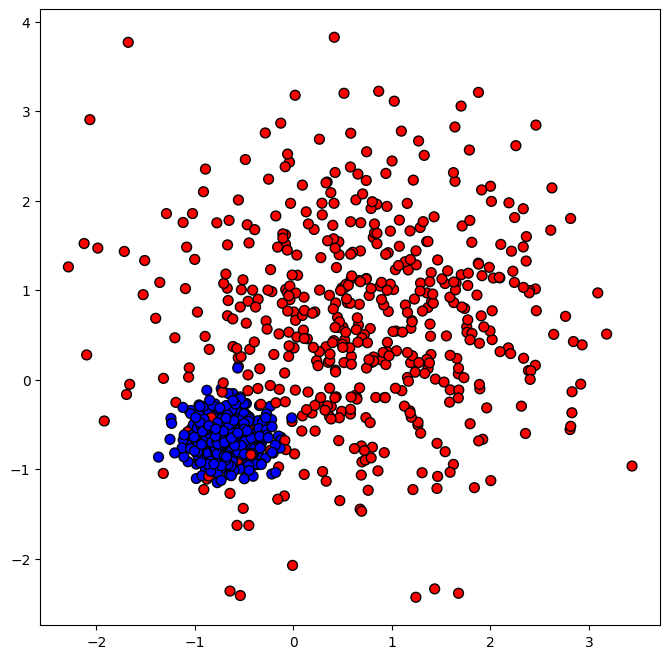

In [58]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate isotropic Gaussian blobs for clustering
n_samples = 1000
n_features = 10
centers = [(0, 0), (3, 3)]
cluster_std = [0.5, 2.5]  # Standard deviation of the clusters

X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, n_features=n_features, random_state=42)

# Apply StandardScaler to normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Plotting the data points
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr', edgecolor='k')
plt.show()


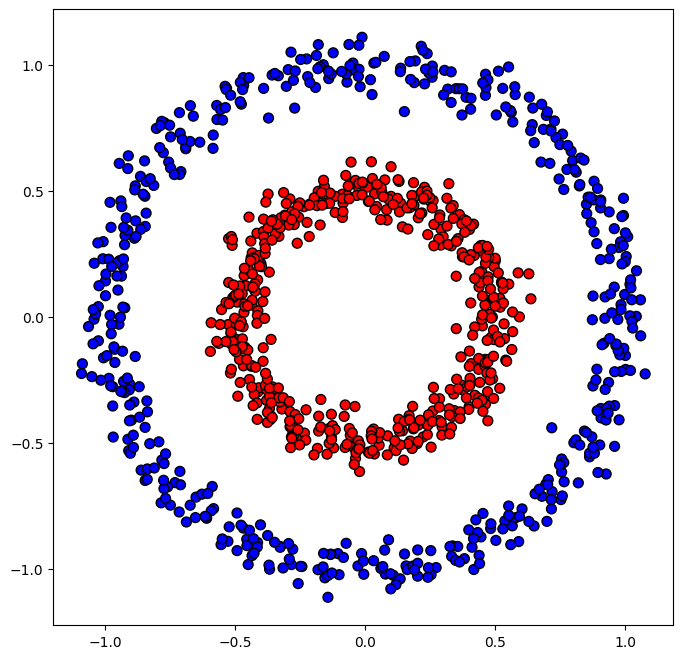

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate circular data points
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.05)

# Plotting the data points
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr', edgecolor='k')
plt.show()


In [59]:
temp_y = y
temt_X = X

In [60]:
X = torch.from_numpy(X).to(torch.float32)
y = torch.from_numpy(y).to(torch.float32)

In [61]:
y = y.long()

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)


In [63]:
class CustomActivation(nn.Module):
    def __init__(self):
        super(CustomActivation, self).__init__()
        # Register k as a learnable parameter
        self.k = nn.Parameter(torch.empty(1))
        # Initialize k
        nn.init.normal_(self.k, mean=0, std=0.1)
        print(self.k)


    def forward(self, x):
        return self.k * abs(x)


In [117]:
class Activation_function_tester(nn.Module):
    def __init__(self):
        super().__init__()
        self.f_1 = nn.Sequential(
            # nn.Linear(2, 10),
            # nn.ReLU(),
            # nn.Linear(10, 5),
            # nn.ReLU(),
            # nn.Linear(5,2)
            # nn.Linear(in_features=2, out_features=2),
            # nn.PReLU(),
            # nn.Linear(in_features=2, out_features=2),
            # nn.PReLU()
            nn.PReLU()
            # # nn.Linear(2, 2)
        )

    def forward(self, x):
        return self.f_1(x)

In [118]:
new_model = Activation_function_tester()

In [76]:
for i in new_model.parameters():
    print(i)

Parameter containing:
tensor([[-0.6131,  0.0996],
        [-0.5813, -0.6744]], requires_grad=True)
Parameter containing:
tensor([0.4071, 0.0565], requires_grad=True)
Parameter containing:
tensor([-0.1080], requires_grad=True)


In [120]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(new_model.parameters(), lr = 0.01)

# Imma train this
epochs = 1000
for i in range(epochs):
    y_pred = new_model(x_train)
    # print(next(iter(new_model.parameters())))
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

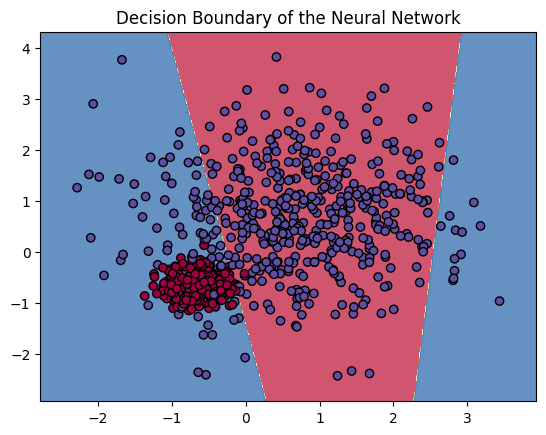

In [81]:
# Create a meshgrid of points
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Convert the meshgrid points to a tensor
grid_tensor = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Get model predictions for each point in the grid
with torch.no_grad():
    Z = new_model(grid_tensor)
    Z = torch.argmax(Z, dim=1).numpy()

# Reshape the predictions to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Spectral)
plt.title("Decision Boundary of the Neural Network")
plt.show()


In [72]:
next(iter(new_model.parameters()))

Parameter containing:
tensor([0.1332], requires_grad=True)

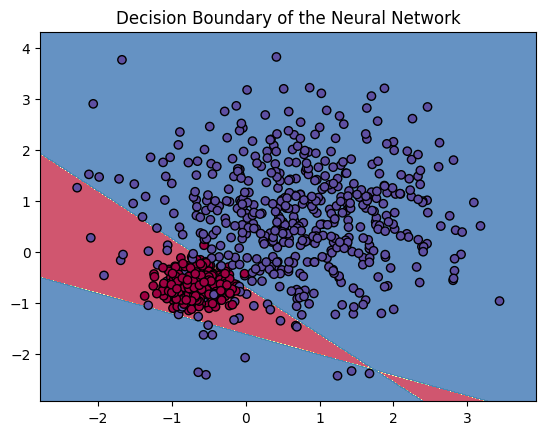

In [84]:
# Create a meshgrid of points
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Convert the meshgrid points to a tensor
grid_tensor = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Get model predictions for each point in the grid
with torch.no_grad():
    Z = new_model(grid_tensor)
    Z = torch.argmax(Z, dim=1).numpy()

# Reshape the predictions to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Spectral)
plt.title("Decision Boundary of the Neural Network")
plt.show()

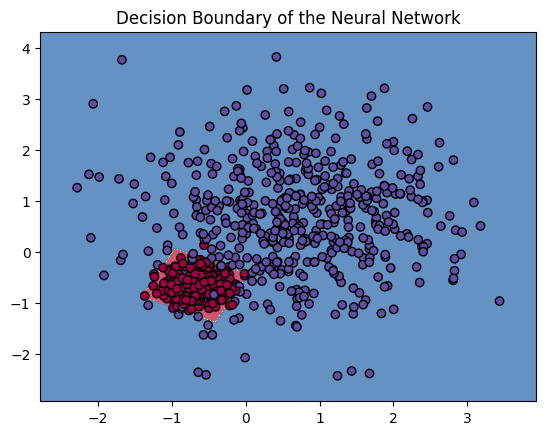

In [97]:
# Create a meshgrid of points
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Convert the meshgrid points to a tensor
grid_tensor = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Get model predictions for each point in the grid
with torch.no_grad():
    Z = new_model(grid_tensor)
    Z = torch.argmax(Z, dim=1).numpy()

# Reshape the predictions to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Spectral)
plt.title("Decision Boundary of the Neural Network")
plt.show()

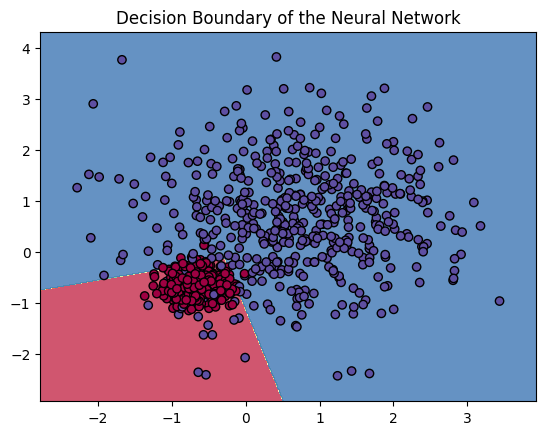

In [107]:
# Create a meshgrid of points
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Convert the meshgrid points to a tensor
grid_tensor = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Get model predictions for each point in the grid
with torch.no_grad():
    Z = new_model(grid_tensor)
    Z = torch.argmax(Z, dim=1).numpy()

# Reshape the predictions to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Spectral)
plt.title("Decision Boundary of the Neural Network")
plt.show()

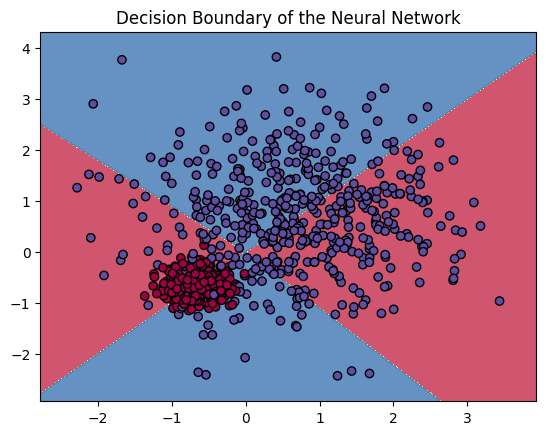

In [121]:
# Create a meshgrid of points
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Convert the meshgrid points to a tensor
grid_tensor = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Get model predictions for each point in the grid
with torch.no_grad():
    Z = new_model(grid_tensor)
    Z = torch.argmax(Z, dim=1).numpy()

# Reshape the predictions to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Spectral)
plt.title("Decision Boundary of the Neural Network")
plt.show()